In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression
pd.option_context('mode.use_inf_as_na', True)

In [2]:
def desc(df):
    return df.describe(include='all')

In [3]:
csv_data = pd.read_csv('1.04.+Real-life+example.csv')
desc(csv_data)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# always check unique numbers should not be in rich amount (means we need to make that much amount of training data)


In [4]:
without_model = csv_data.drop(['Model'],axis = 1)
# without_model = csv_data
desc(without_model)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# below function will show true if data is null
without_model.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [6]:
# count numbers of null values
without_model.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

# As You can see there are 172 null price observations and 150 EngineV null values
# We must remove that rows as it can effect our regression analysis in bad way

In [7]:
# Below function will remove null values row from DataFrame
data_no_nv= without_model.dropna(axis=0)
data_no_nv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
def showHistPlot(data):
    sns.histplot(data, kde=True,stat="density", kde_kws=dict(cut=3),  edgecolor=(1, 1, 1, .4)) 

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


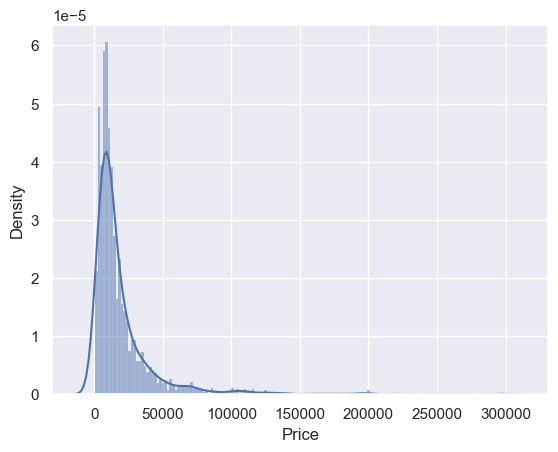

In [9]:
showHistPlot(data_no_nv['Price']) 

In [10]:
# quantile takes 0-1(0-100%) values 
# quantile helps us to remove OutLiers
q = data_no_nv['Price'].quantile(0.99)
q

129812.51999999981

In [11]:
data_1 = data_no_nv[data_no_nv['Price']<q]
desc(data_1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


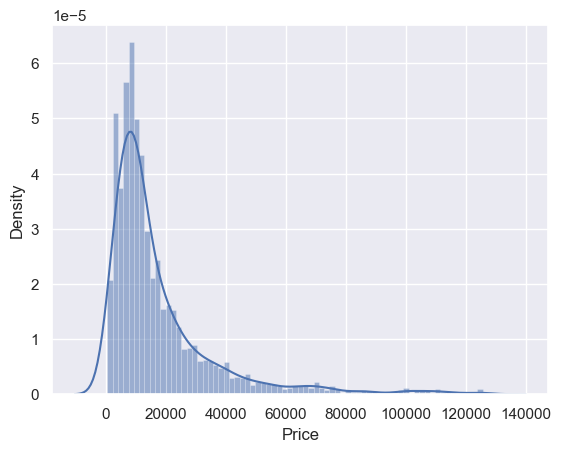

In [12]:
showHistPlot(data_1['Price'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


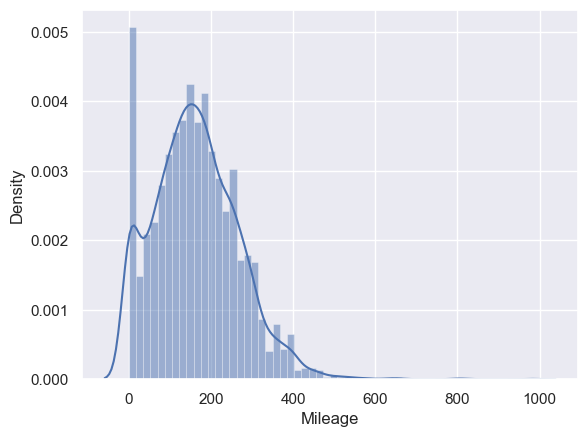

In [13]:
showHistPlot(data_no_nv['Mileage'])

In [14]:
q =data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
desc(data_2)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


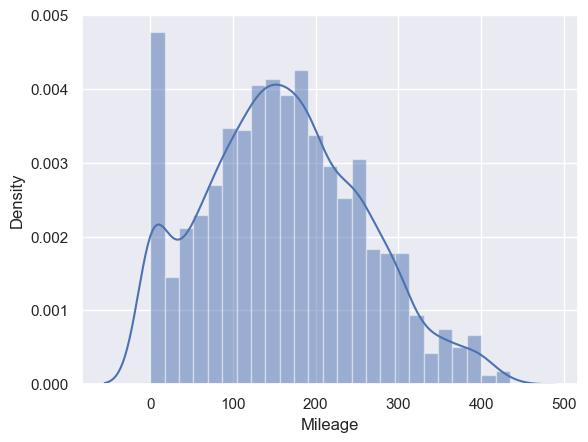

In [15]:
showHistPlot(data_2['Mileage'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


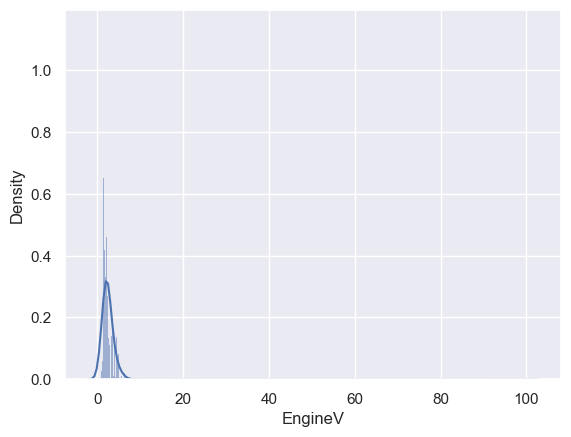

In [16]:
showHistPlot(data_2['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
desc(data_3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000,3921
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,185
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019,NaN
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


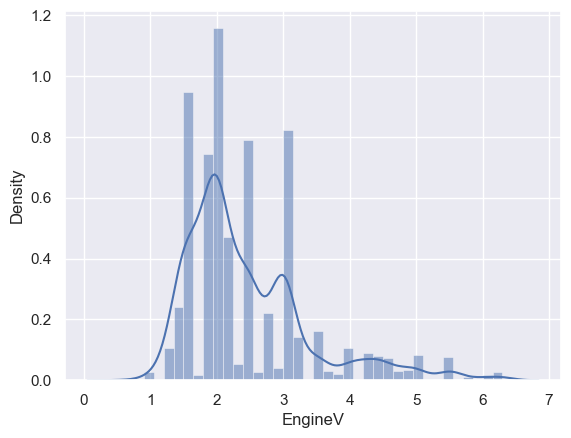

In [18]:
showHistPlot(data_3['EngineV'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


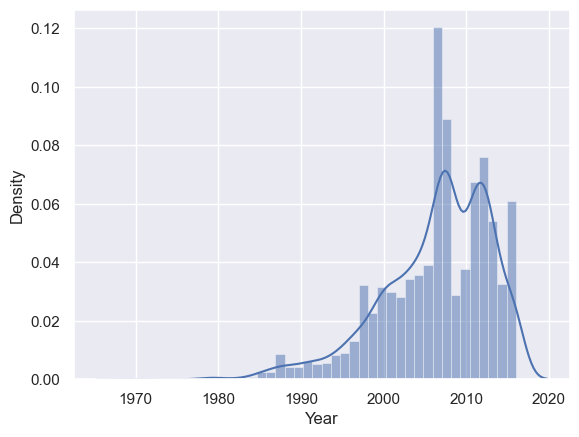

In [19]:
showHistPlot(data_3['Year'])

In [20]:
# quantile value is 0.1 becuase year's graph is negative skew
q = data_3['Year'].quantile(0.1)
data_4 =  data_3[data_3['Year']>q]
desc(data_4)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3459,3459.000000,3459,3459.000000,3459.000000,3459,3459,3459.000000,3459
unique,7,NaN,6,NaN,NaN,4,2,NaN,263
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Vito
freq,762,NaN,1207,NaN,NaN,1698,3170,NaN,149
mean,NaN,19798.156652,NaN,147.932639,2.464053,NaN,NaN,2008.148598,NaN
std,NaN,19542.540521,NaN,86.691460,0.972008,NaN,NaN,4.575174,NaN
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000,NaN
25%,NaN,8400.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000,NaN
50%,NaN,12850.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,23500.000000,NaN,205.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


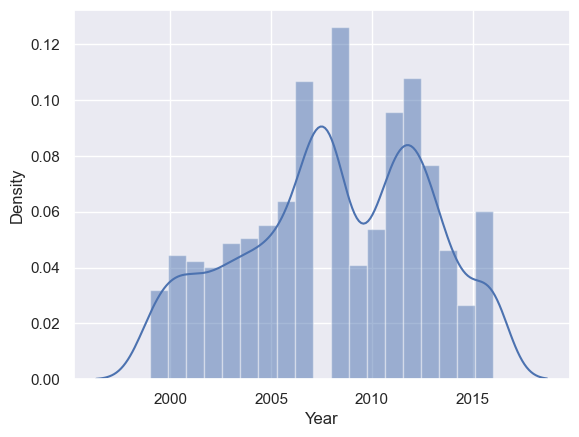

In [21]:
showHistPlot(data_4['Year'])

In [22]:
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [23]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


Text(0.5, 1.0, 'Price And Mileage')

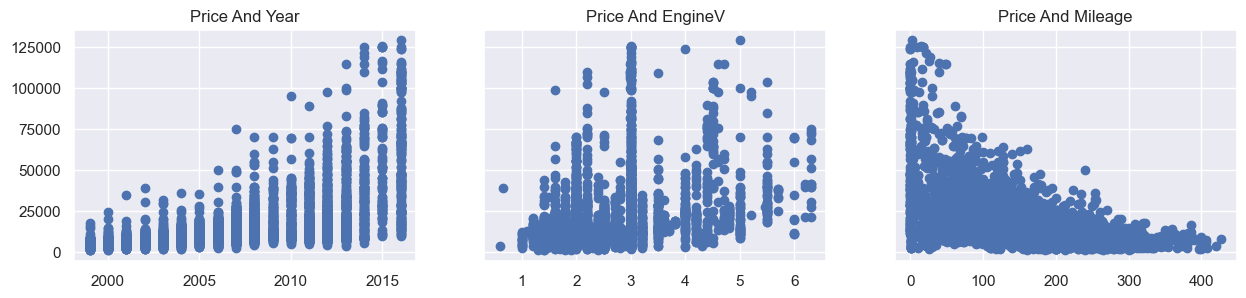

In [24]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price And Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price And EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price And Mileage')

In [25]:
# Whenever the graph doesn't show in linear way that means there is some issues with data 
# so we numpy's log method to make linear relation between dependent and independent variable  
# log will accept y(dependent) value and y is 'Price'
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price']  = log_price
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


Text(0.5, 1.0, 'Log Price And Mileage')

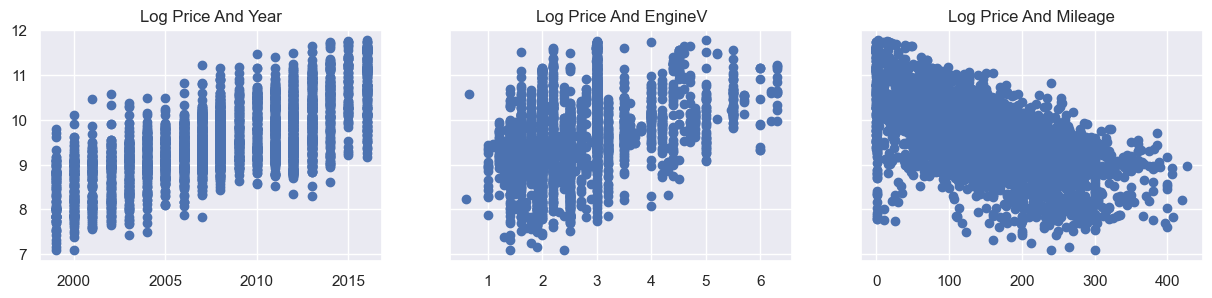

In [26]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price And Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price And EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price And Mileage')

# Multicollinearity

In [27]:
# To check if independent variables have any type of MultiColliearity using Variance_Inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# only take number values column
# variance_inflation_factor will take feature's value and index of feature
variables = data_cleaned[['Mileage', 'EngineV','Year']]
featuresLength = variables.shape[1];
vif = pd.DataFrame()
# index will be (0,1,2)
vif['VIF'] = [variance_inflation_factor(variables.values, index) for index in range(featuresLength)]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.891813,Mileage
1,7.424041,EngineV
2,10.133661,Year


# As you can see the year's VIF value is more than 10 so year column will be removed 
# As there is multicollinearity issue with year values

In [29]:
log_price_data = data_cleaned.drop(['Year'],axis=1) 

In [30]:
log_price_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,A6,9.560997
...,...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,S 350,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,535,8.779557


# Creating dummies to test data

In [31]:
# We will always drop first feature's dummy because all other feature's dummy will already represent first feature's value
# panda provide us method "get_dummies" 
dummy_data = pd.get_dummies(log_price_data, drop_first = True)
dummy_data = dummy_data.replace({False:0,True:1})

In [32]:
dummy_data.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
0,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200,2.7,9.560997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dummy_data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_116', 'Model_118', 'Model_120', 'Model_200', 'Model_210',
       'Model_220', 'Model_316', 'Model_318', 'Model_320', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_525',
       'Model_528', 'Model_530', 'Model_535', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1',

In [34]:
cols = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
dummy_data= dummy_data[cols]
dummy_data.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Declare the inputs/features and targets/output

In [35]:
log_price = dummy_data['log_price']
inputs = dummy_data.drop(['log_price'],axis=1)


# Scale the Data

In [36]:
# to Make all features a similar unit 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# takes features as argument
scaler.fit(inputs)

StandardScaler()

In [37]:
# Transforming all features value to similar unit 
input_scaled = scaler.transform(inputs)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(input_scaled, log_price, test_size = 0.2 ,random_state = 365 )

In [39]:
x_train.shape,y_train.shape

((2767, 17), (2767,))

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
reg.coef_

array([-0.41094084,  0.20745738,  0.02768142,  0.01023398, -0.15423537,
       -0.20660834, -0.07549277, -0.0914711 , -0.12790568, -0.09171446,
       -0.14699288, -0.10769341, -0.16128384, -0.09890293, -0.02971824,
       -0.14300024,  0.30352601])

In [42]:
reg.score(x_train,y_train)

0.7781436482528401

In [43]:
reg.intercept_

9.549125860257886

In [44]:
y_hat = reg.predict(x_train)

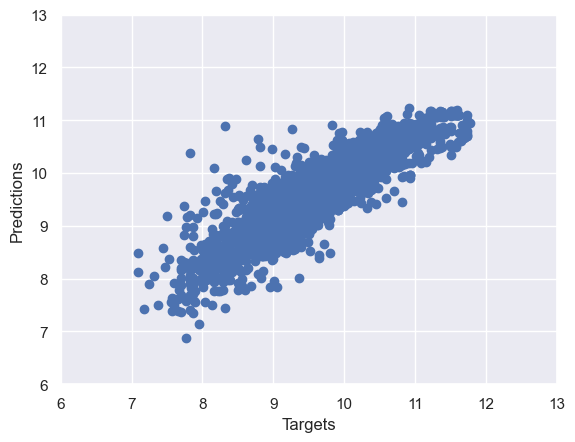

In [45]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


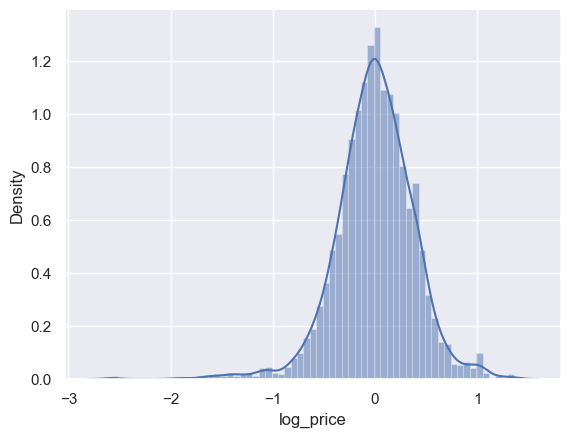

In [46]:
showHistPlot(y_train-y_hat)

In [47]:
bias_weights = pd.DataFrame({'Features': inputs.columns.values,'Weights': reg.coef_, })
bias_weights

,Features,Weights
0,Mileage,-0.410941
1,EngineV,0.207457
2,Brand_BMW,0.027681
3,Brand_Mercedes-Benz,0.010234
4,Brand_Mitsubishi,-0.154235
5,Brand_Renault,-0.206608
6,Brand_Toyota,-0.075493
7,Brand_Volkswagen,-0.091471
8,Body_hatch,-0.127906
9,Body_other,-0.091714


In [48]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

<h4>feature values </h4>
<ol>
    <li> if any input(not dummy) value is positive then its mean increasing in that input/feature's value will increase the dependent feature's value</li>
    <li> if any input(not dummy) value is negative then its mean increasing in that input/feature's value will decrease the dependent feature's value</li>
</ol>
<h4>dummies values </h4>
<h6>if all dummy(related to any category (For Example 'Brand_Renault' is related to 'Brand' category)) 
    are zero values then the banchmark will be the dropped dummy in case of 'Brand' we dropped 'Audi'.</h6><h6> because we know if all 'Brand' dummy will be 0 then dropped one will be the 1(benchmark)</h6>

<ol>
    <li> A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi)</li>
    as Example > 'Brand_BMW' has positive value so its means its more bigger than banchmark (in the scenario of car selling we can say its more expensive than 'Audi')
    <li> A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi)</li>
    as Example > 'Brand_Renault' has negative value so its means its less than banchmark (in the scenario of car selling we can say its cheaper than 'Audi')
</ol>

In [49]:
y_test_hat = reg.predict(x_test)

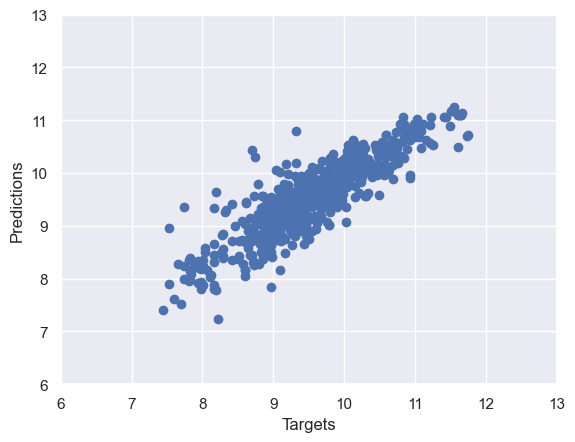

In [50]:
plt.scatter(y_test,y_test_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [51]:
# because in testing we need actual prices to be predicted not the log_prices
# we use numpy's function np.exp() to convert predicted log price to actual price values  
df_pf = pd.DataFrame({"Predictions":np.exp(y_test_hat)})
df_pf.head()

,Predictions
0,15846.309072
1,22696.438159
2,12850.899046
3,3520.556716
4,20347.016266


In [52]:
df_pf['Target'] = np.exp(y_test.reset_index(drop=True))
df_pf

,Predictions,Target
0,15846.309072,21800.0
1,22696.438159,32000.0
2,12850.899046,8499.0
3,3520.556716,5400.0
4,20347.016266,28500.0
...,...,...
687,3963.328108,6650.0
688,23386.351046,33200.0
689,3780.737538,3000.0
690,37630.111129,25500.0


In [53]:
df_pf['Residual'] = df_pf['Target']-df_pf['Predictions']
df_pf

,Predictions,Target,Residual
0,15846.309072,21800.0,5953.690928
1,22696.438159,32000.0,9303.561841
2,12850.899046,8499.0,-4351.899046
3,3520.556716,5400.0,1879.443284
4,20347.016266,28500.0,8152.983734
...,...,...,...
687,3963.328108,6650.0,2686.671892
688,23386.351046,33200.0,9813.648954
689,3780.737538,3000.0,-780.737538
690,37630.111129,25500.0,-12130.111129


In [54]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100 )
df_pf

,Predictions,Target,Residual,Difference%
0,15846.309072,21800.0,5953.690928,27.310509
1,22696.438159,32000.0,9303.561841,29.073631
2,12850.899046,8499.0,-4351.899046,51.204836
3,3520.556716,5400.0,1879.443284,34.804505
4,20347.016266,28500.0,8152.983734,28.606960
...,...,...,...,...
687,3963.328108,6650.0,2686.671892,40.401081
688,23386.351046,33200.0,9813.648954,29.559184
689,3780.737538,3000.0,-780.737538,26.024585
690,37630.111129,25500.0,-12130.111129,47.569063


In [55]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,692.000000,692.000000,692.000000,692.000000
mean,17512.265319,19243.825448,1731.560129,31.774325
std,13126.671431,19390.750145,10074.417582,41.452694
min,1389.031233,1700.000000,-37755.329557,0.175601
25%,8704.058334,8200.000000,-2655.197802,11.739026
50%,13408.321043,12450.000000,55.963934,24.197981
75%,22704.891474,22900.000000,3390.086276,38.242843
max,77009.441048,126000.000000,80800.315250,462.443212


In [56]:
pd.options.display.max_rows= 999
pd.set_option('display.float_format', lambda x: '%.2f'% x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
606,14474.54,14500.00,25.46,0.18
58,11025.22,11000.00,-25.22,0.23
561,7676.55,7650.00,-26.55,0.35
293,13748.39,13700.00,-48.39,0.35
439,15929.80,16000.00,70.20,0.44
356,18888.82,18800.00,-88.82,0.47
125,15081.35,15000.00,-81.35,0.54
248,34298.68,34500.00,201.32,0.58
337,8349.16,8300.00,-49.16,0.59
608,60946.99,61500.00,553.01,0.90
